## Time series forecasing in Tensorflow

Thao tác trên file EURUSD.csv để tạo ra file mới là EURUSD_new.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
#df = pd.read_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD.csv")

#df.head(5)


## Các thao tác phân tích, xử lý và trực quan dữ liệu 

In [3]:
# # Đổi cột Date sang Index
# df.Date = pd.to_datetime(df.Date, dayfirst = False) 
# df.set_index("Date", inplace = True)

# df.head(5)

In [4]:
# eurusd_prices = pd.DataFrame(df["Open"]).rename(columns={"Open": "Price"})

# eurusd_prices.head(5)

In [5]:
# from datetime import date
# d0 = date(2022, 10, 14)
# d1 = date(2004, 1, 1)
# delta = abs(d0 - d1)

# print("Số ngày từ 1/1/2004 -> 14/10/2022     : " + str(delta.days + 1) + " ngày")

# print("")

# print("Dữ liệu có trong dữ liệu hiện tại gồm : " + str(len(df)) + " ngày (Đã bao gồm giá trị Null)")

# print("")

# print("Dữ liệu thiếu                         : " + str(delta.days + 1- len(df)) + " ngày")

In [6]:
# time_sdata = pd.date_range("01/01/2004", periods=6862, freq="D") # 6862 là số ngày tính từ 1/1/2004 -> 14/10/2022 
# data = pd.DataFrame(index=time_sdata)
# data["Date"] = time_sdata 
# data.set_index("Date", inplace = True)

In [7]:
# import numpy as np 
# # Khởi tạo các cột mới trong data 
# data["Open"] = [np.NaN]*len(data)
# data["High"] = [np.NaN]*len(data)
# data["Low"] = [np.NaN]*len(data)
# data["Close"] = [np.NaN]*len(data)
# data["Adj Close"] = [np.NaN]*len(data)
# data["Volume"] = [np.NaN]*len(data)

In [8]:
# # Chuyển dữ liệu từ df sang data (Các dữ liệu k có ở df thì tương ứng ở data sẽ là NaN)
# for i in range(len(df)):
#     for j in range(i, len(data)):
#         if df.index[i] == data.index[j]:
#             data[:][j:j+1] = df[:][i:i+1]
#             break 
        
# data

In [9]:
# Lưu lại dữ liệu mới  
#data.to_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD_new.csv")

Thao tác trên file EURUSD_new.csv, Dữ liệu thao tác lưu vào biến data

In [10]:
data = pd.read_csv("/content/drive/MyDrive/Data Scientist/Data/EURUSD_new.csv")


In [11]:
data.isnull().sum()

Date            0
Open         1989
High         1989
Low          1989
Close        1989
Adj Close    1989
Volume       1989
dtype: int64

In [12]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.0
mean,1.247379,1.252041,1.242237,1.247391,1.247391,0.0
std,0.123631,0.124361,0.124143,0.123624,0.123624,0.0
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0
25%,1.137139,1.140901,1.133800,1.137139,1.137139,0.0
50%,1.236598,1.240325,1.230300,1.236308,1.236308,0.0
75%,1.336095,1.340986,1.331079,1.336112,1.336112,0.0
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0


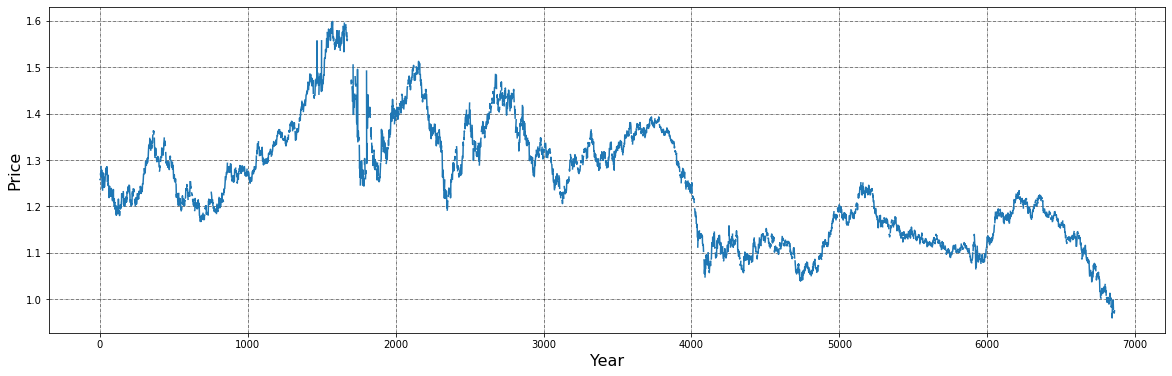

In [13]:
# Trực quan cột Close trong data 
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

data['Close'].plot(figsize=(20, 6))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

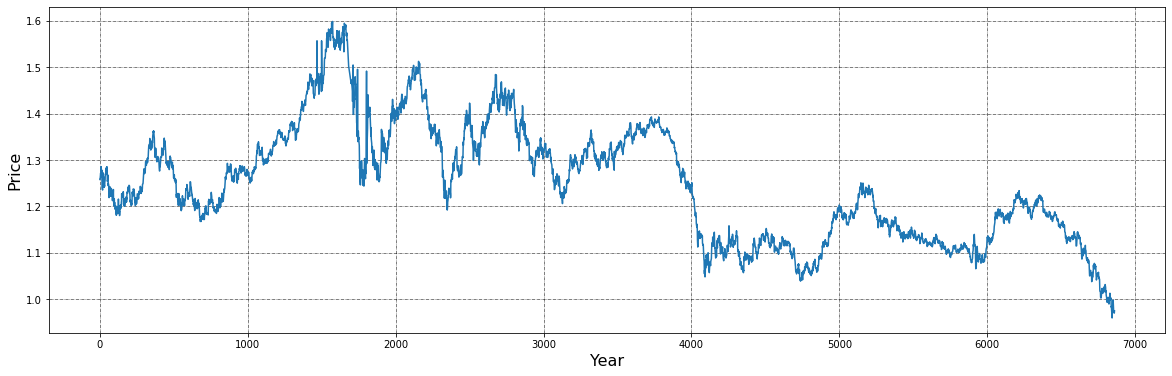

In [14]:
# Điền khuyết 
data = data.interpolate()

data['Close'].plot(figsize=(20, 6))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

In [15]:
timesteps = data.index.to_numpy()
prices = data["Open"].to_numpy()

timesteps[:10], prices[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1.259002  , 1.258194  , 1.260097  , 1.262     , 1.263903  ,
        1.268907  , 1.272394  , 1.264095  , 1.277498  , 1.27993267]))

In [16]:
# Khởi tạo tập Train-Test 
split_size = int(0.8 * len(prices)) # 80% train, 20% test

X_train, y_train = timesteps[:split_size], prices[:split_size]


X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(5489, 1373, 5489, 1373)

In [17]:
# Tạo hàm vẽ dữ liệu time series
from numpy import size


def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("EUR/USD")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

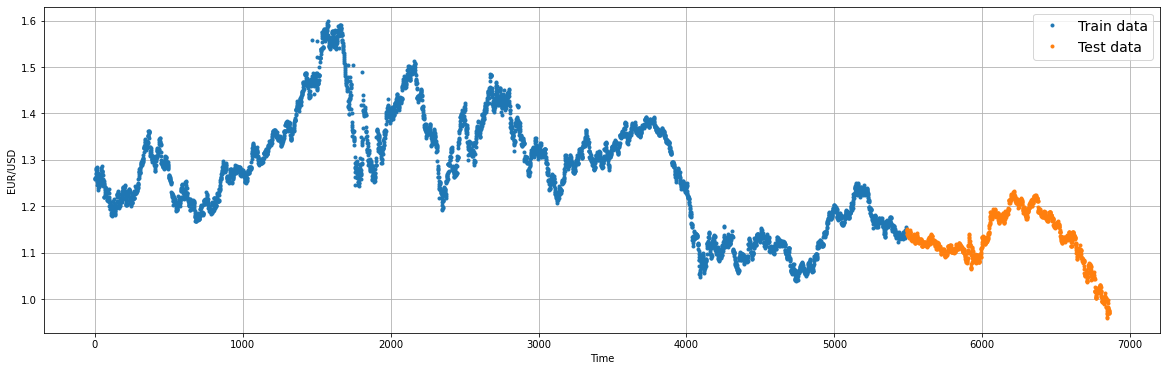

In [18]:
plt.figure(figsize=(20, 6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments


| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |


horizon: số bước dự đoán trong tương lai (ngày)

window size: số bước trong quá khứ dùng để dự đoán (ngày)

## Khởi tạo 1 số hàm để sử dụng

### make_train_test_splits

In [19]:
# Chia tập train-test tỉ lệ 80-20

def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

### mean_absolute_scaled_error

In [20]:
# Hàm tính MASE 
def mean_absolute_scaled_error(y_true, y_pred):
  
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) 

  return mae / mae_naive_no_season

### make_preds

In [21]:
# Tạo hàm để model dự đoán 
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast) 

### evaluate_preds

In [22]:
# Hàm đánh giá hiệu quả dự đoán của mô hình 
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0: 
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

### create_model_checkpoint

In [23]:
# Modelling checkpoint 

# Sử dụng:  [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint). 

# => Theo dõi hiệu suất tốt nhất của model và lưu lại, khi đánh giá sẽ sử dụng cấu hình tốt nhất của model.
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                            verbose=0, 
                                            save_best_only=True) # Chỉ lưu model tốt nhất vào tệp 

### get_labelled_windows

In [24]:
# Create function to label windowed data

def get_labelled_windows(x, horizon=1):
  """
  Ví dụ: 
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

### make_windows

In [25]:
def make_windows(x, window_size=7, horizon=1):
  
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

    windowed_array = x[window_indexes]

    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

# Nguồn tham khảo: (https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5)

### test 

In [29]:
import numpy as np

In [30]:
# Khởi tạo dữ liệu: horizon = 1, window  = 7 
# Ví dụ: 

# [1,2,3,4,5,6,7] -> 8

# [2,3,4,5,6,7,8] -> 9 

# [3,4,5,6,7,8,9] -> 10 

# Sử dụng dữ liệu 7 ngày liên tiếp để dự đoán 1 ngày tiếp theo 
HORIZON = 1 
WINDOW_SIZE = 7 

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

# Kiểm tra 3 cái đầu tiên 
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1.259002 1.258194 1.260097 1.262    1.263903 1.268907 1.272394] -> Label: [1.264095]
Window: [1.258194 1.260097 1.262    1.263903 1.268907 1.272394 1.264095] -> Label: [1.277498]
Window: [1.260097 1.262    1.263903 1.268907 1.272394 1.264095 1.277498] -> Label: [1.27993267]


In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(5484, 1371, 5484, 1371)

## Model 0:  Naïve model

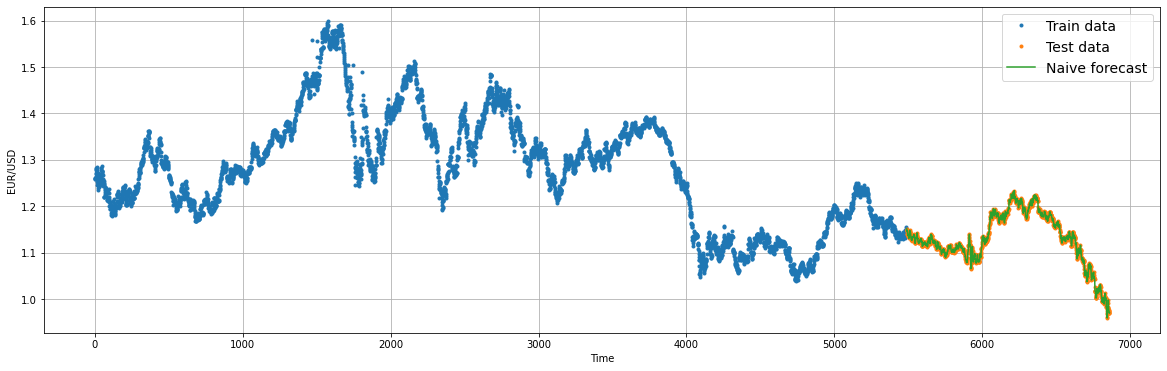

In [32]:
# Khởi tạo 
naive_forecast = y_test[:-1] # Khởi tạo không bao gồm giá trị cuối cùng 

plt.figure(figsize=(20, 6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

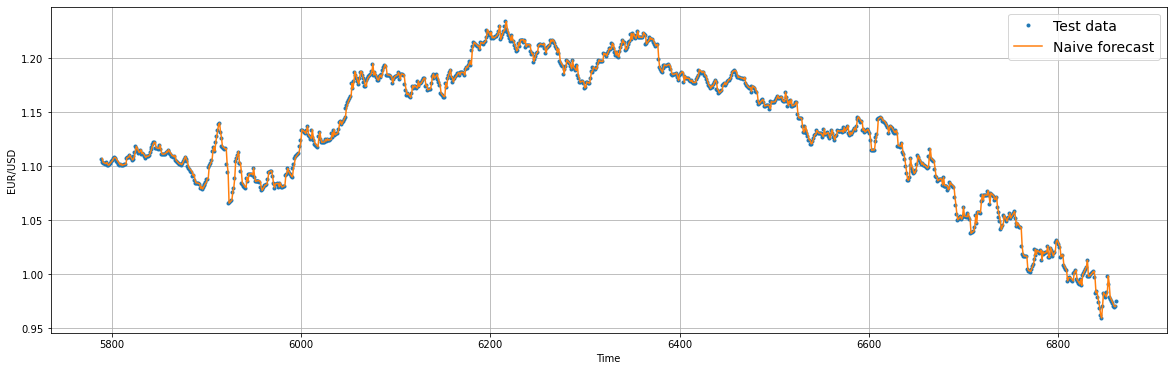

In [33]:
plt.figure(figsize=(20, 6))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [34]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.0025810667,
 'mse': 1.430855e-05,
 'rmse': 0.0037826644,
 'mape': 0.23056765,
 'mase': 0.9997643}

## Model 1: Dense model (window = 7, horizon = 1)

In [35]:
HORIZON = 1 
WINDOW_SIZE = 7 

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")], name="model_1_dense") 


model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 


model_1.fit(x=train_windows, 
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) 

Epoch 1/100
43/43 [==============================] - 4s 18ms/step - loss: 0.1366 - mae: 0.1366 - val_loss: 0.0255 - val_mae: 0.0255
Epoch 2/100
43/43 [==============================] - 1s 12ms/step - loss: 0.0106 - mae: 0.0106 - val_loss: 0.0080 - val_mae: 0.0080
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0093 - mae: 0.0093 - val_loss: 0.0083 - val_mae: 0.0083
Epoch 4/100
43/43 [==============================] - 1s 13ms/step - loss: 0.0089 - mae: 0.0089 - val_loss: 0.0071 - val_mae: 0.0071
Epoch 5/100
43/43 [==============================] - 1s 13ms/step - loss: 0.0088 - mae: 0.0088 - val_loss: 0.0054 - val_mae: 0.0054
Epoch 6/100
43/43 [==============================] - 1s 13ms/step - loss: 0.0088 - mae: 0.0088 - val_loss: 0.0052 - val_mae: 0.0052
Epoch 7/100
43/43 [==============================] - 1s 13ms/step - loss: 0.0089 - mae: 0.0089 - val_loss: 0.0052 - val_mae: 0.0052
Epoch 8/100
43/43 [==============================] - 0s 4ms/step - loss: 0.00

In [36]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")

model_1_preds = make_preds(model_1, input_data=test_windows)

model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)

model_1_results

43/43 [==============================] - 0s 1ms/step


{'mae': 0.0033408692,
 'mse': 2.1466682e-05,
 'rmse': 0.004633215,
 'mape': 0.29881847,
 'mase': 1.2937651}

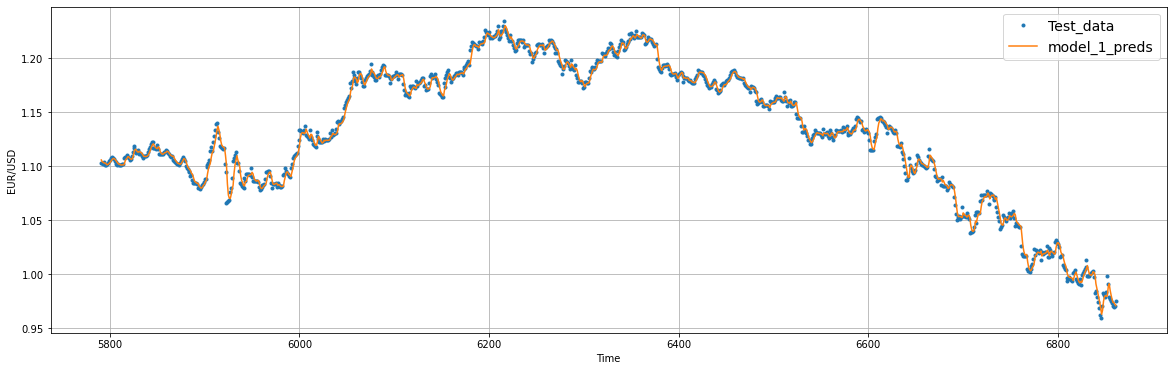

In [37]:
offset = 300
plt.figure(figsize=(20,6))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [38]:
HORIZON = 1 
WINDOW_SIZE = 30 

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) 
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [39]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")

model_2.evaluate(test_windows, test_labels)

model_2_preds = make_preds(model_2, input_data=test_windows)

model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)

model_2_results

43/43 [==============================] - 0s 2ms/step


{'mae': 0.0049831863,
 'mse': 4.4833734e-05,
 'rmse': 0.0066957995,
 'mape': 0.4464942,
 'mase': 1.9296889}

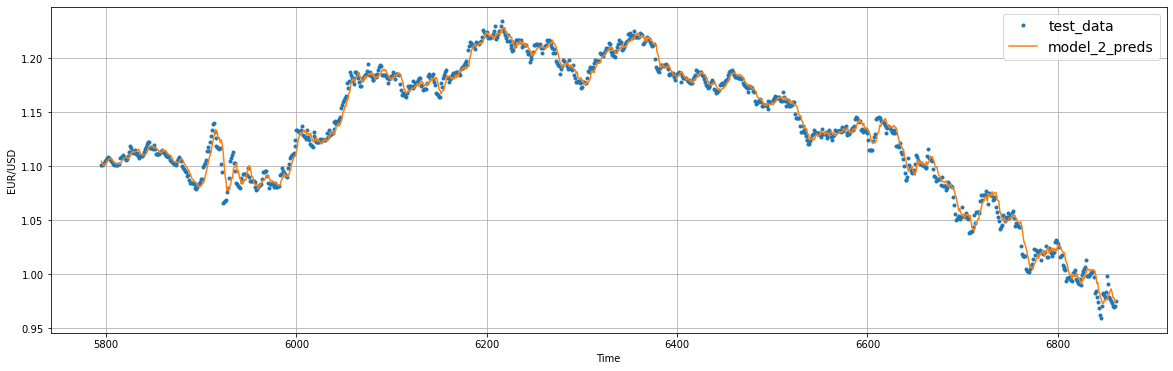

In [40]:
offset = 300
plt.figure(figsize=(20, 6))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

## Model 3: Dense (window = 30, horizon = 7)

In [41]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [42]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")

model_3_preds = make_preds(model_3,
                           input_data=test_windows)

model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results                           

43/43 [==============================] - 0s 1ms/step


{'mae': 0.007908578,
 'mse': 0.00011383113,
 'rmse': 0.008880282,
 'mape': 0.7088821,
 'mase': 3.0612614}

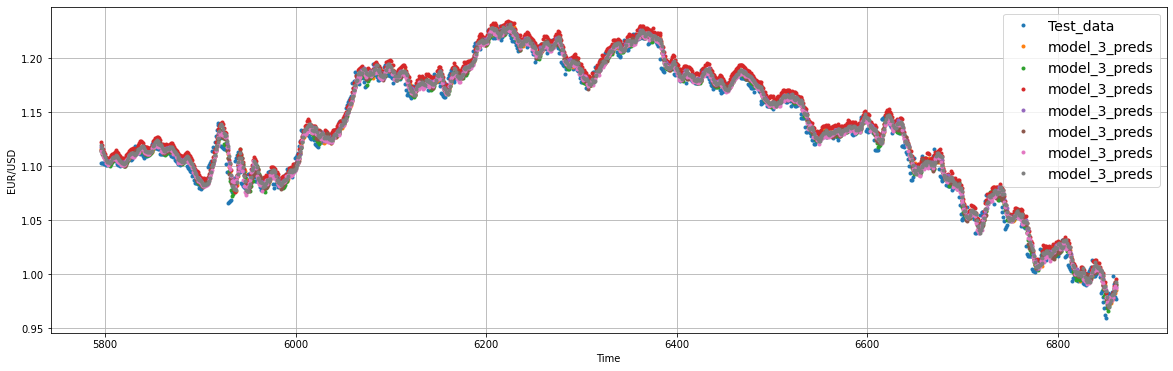

In [43]:
# Mỗi dự đoán là 7 ngày liên tiếp -> 7 model_3_preds được vẽ ra 
offset = 300
plt.figure(figsize=(20, 6))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")

plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

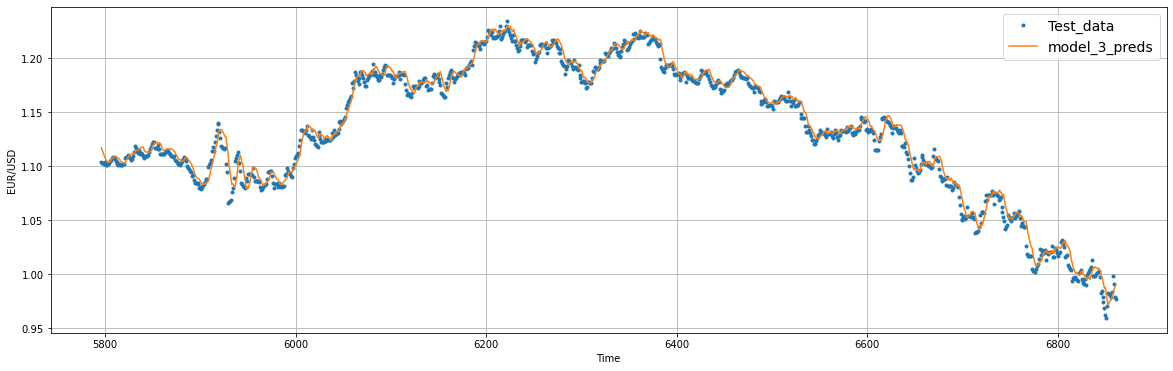

In [44]:
# Lấy 1 giá trị đại diện
offset = 300
plt.figure(figsize=(20, 6))

plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

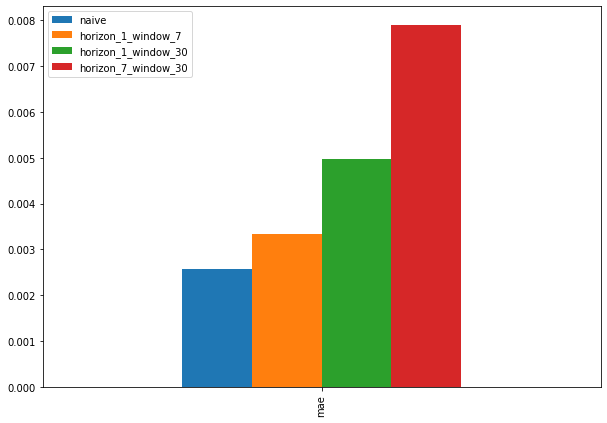

In [45]:
# So sánh xem model nào hoạt động tốt nhất bằng chỉ số mae 
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

## Model 4: Conv1D 

In [46]:
HORIZON = 1 
WINDOW_SIZE = 7 

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), 
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [47]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")

model_4_preds = make_preds(model_4, test_windows)

model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)

model_4_results                               

43/43 [==============================] - 0s 2ms/step


{'mae': 0.0036253957,
 'mse': 2.4643252e-05,
 'rmse': 0.004964197,
 'mape': 0.3242404,
 'mase': 1.403949}

## Model 5: RNN(LSTM)

In [48]:
tf.random.set_seed(42)


inputs = layers.Input(shape=(WINDOW_SIZE))

x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 

x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # Lỗi nếu input không đúng hình dạng 
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)

output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")


model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [49]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")

model_5_preds = make_preds(model_5, test_windows)

model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

43/43 [==============================] - 0s 2ms/step


{'mae': 0.0052609798,
 'mse': 5.101551e-05,
 'rmse': 0.0071425145,
 'mape': 0.4743787,
 'mase': 2.0373356}

## Model 6: N-BEATS

In [50]:
# Khởi tạo NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):   
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [51]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [52]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)

# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.49590105  0.22376382 -0.02924329 -0.13115686  0.09909858 -0.27410793
 -0.26703227]
Forecast: 0.04898370802402496


In [61]:
HORIZON = 1 
WINDOW_SIZE = 7

eurusd_nbeats = data.copy()
for i in range(WINDOW_SIZE):
  eurusd_nbeats[f"Close+{i+1}"] = eurusd_nbeats["Close"].shift(periods=i+1)

del eurusd_nbeats["Open"]
del eurusd_nbeats["High"]
del eurusd_nbeats["Low"]
del eurusd_nbeats["Adj Close"]
del eurusd_nbeats["Volume"]
eurusd_nbeats.set_index("Date", inplace = True)

eurusd_nbeats.dropna().head()

,Close,Close+1,Close+2,Close+3,Close+4,Close+5,Close+6,Close+7
Date,,,,,,,,
2004-01-08,1.277498,1.264095,1.272103,1.268698,1.265197,1.261695,1.258194,1.258194
2004-01-09,1.285892,1.277498,1.264095,1.272103,1.268698,1.265197,1.261695,1.258194
2004-01-10,1.281960,1.285892,1.277498,1.264095,1.272103,1.268698,1.265197,1.261695
2004-01-11,1.278028,1.281960,1.285892,1.277498,1.264095,1.272103,1.268698,1.265197
2004-01-12,1.274096,1.278028,1.281960,1.285892,1.277498,1.264095,1.272103,1.268698


In [63]:
# Make features and labels
X = eurusd_nbeats.dropna().drop("Close", axis=1)
y = eurusd_nbeats.dropna()["Close"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(5484, 5484, 1371, 1371)

In [64]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [65]:
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [66]:
# # Make tensors
# tensor_1 = tf.range(10) + 10
# tensor_2 = tf.range(10)

# # Subtract
# subtracted = layers.subtract([tensor_1, tensor_2])

# # Add
# added = layers.add([tensor_1, tensor_2])

# print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
# print(f"Subtracted: {subtracted.numpy()}")
# print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [67]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_6 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_6_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_6.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 161: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 354: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 691: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 791: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 891: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 991: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 1091: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.
CPU times: user 6min 49s, sys: 12.9 s, total: 7min 2s
Wall time: 8min 13s


In [68]:
model_6.evaluate(test_dataset) 

model_6_preds = make_preds(model_6, test_dataset)

model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)

model_6_results

2/2 [==============================] - 1s 32ms/step


{'mae': 0.002572235,
 'mse': 1.4366747e-05,
 'rmse': 0.0037903492,
 'mape': 0.22998609,
 'mase': 0.9971831}

In [70]:
model_6.save(model_6.name)

## Model 7: Creating an ensemble (stacking different models together)

In [71]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [72]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 108: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 273: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 377: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 477: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 577: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 677: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 777: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 877: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.

Epoch 977: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 176: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 276: ReduceLROnPlateau reducing learning rate to 1.0000000474974

In [73]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [74]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

2/2 [==============================] - 0s 6ms/step


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 7ms/step


{'mae': 0.003926414,
 'mse': 2.875911e-05,
 'rmse': 0.005362752,
 'mape': 0.3514965,
 'mase': 1.5221603}

In [75]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

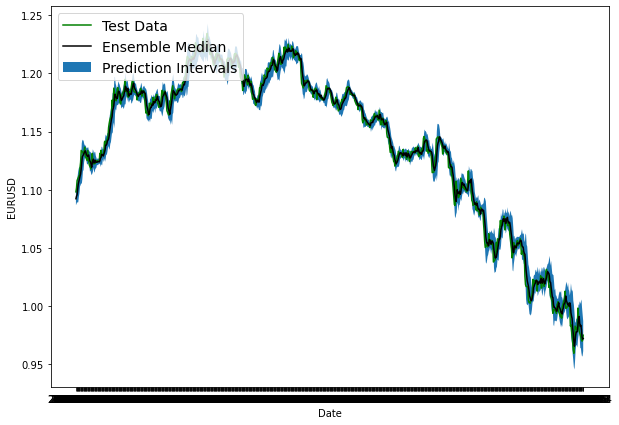

In [76]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("EURUSD")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [77]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_NBEATs": model_6_results,
                              "model_7_ensemble": ensemble_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,0.002581,0.000014,0.003783,0.230568,0.999764
model_1_dense_w7_h1,0.003341,0.000021,0.004633,0.298818,1.293765
model_2_dense_w30_h1,0.004983,0.000045,0.006696,0.446494,1.929689
model_3_dense_w30_h7,0.007909,0.000114,0.008880,0.708882,3.061261
model_4_CONV1D,0.003625,0.000025,0.004964,0.324240,1.403949
model_5_LSTM,0.005261,0.000051,0.007143,0.474379,2.037336
model_6_NBEATs,0.002572,0.000014,0.003790,0.229986,0.997183
model_7_ensemble,0.003926,0.000029,0.005363,0.351496,1.522160


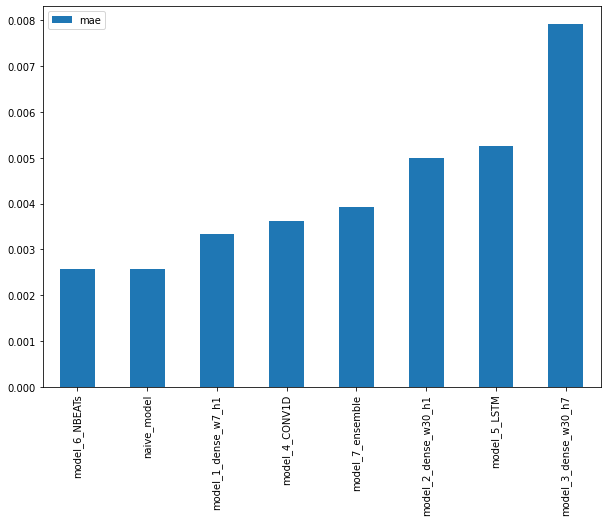

In [78]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")